# <span style="color:darkblue"> QTM 151 - Quiz 4 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [83]:
# Write your answer here
print("Michael Zhao")



Michael Zhao


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [84]:
# Write your answer here:
print("I will abide by Emory's code of conduct")

I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [85]:
# Write your answer here
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 16.


In [86]:
# Write your own code
currencies = pd.read_csv("data_raw/currencies.csv")
currencies['date'] = pd.to_datetime(currencies['date_string'], format='mixed')
#'%A, %b %d, %Y' don't work, for some reason

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 18 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


Text(0.5, 1.0, 'The evolution of the stock market')

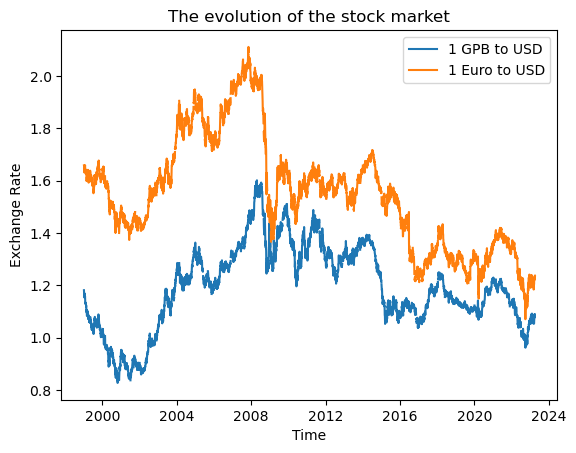

In [87]:
# Write your own code
plt.plot(currencies["date"], currencies["gbp_to_usd"], label="1 GPB to USD")
plt.xlabel("Time")
plt.ylabel("Exchange Rate")
plt.plot(currencies["date"], currencies["eur_to_usd"], label="1 Euro to USD")
plt.legend(["1 GPB to USD", "1 Euro to USD"])
plt.title("The evolution of the stock market")

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)```

In [88]:
# Write your own code
currencies['growth_euro'] = currencies['eur_to_usd'].diff() / currencies['eur_to_usd'].shift(1) * 100

<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 18 to create a shaded region <br>
for time periods where "bool_cond" is true.



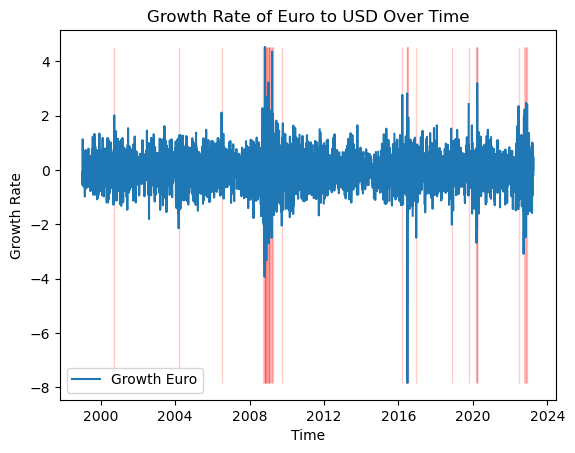

In [89]:
# Write your own code

currencies['bool_cond'] = (currencies['growth_euro'] > 2) | (currencies['growth_euro'] < -2)
plt.plot(currencies["date"], currencies["growth_euro"], label="Growth Euro")
plt.fill_between(x= currencies["date"],
                 y1 = currencies['growth_euro'].min(),
                 y2 = currencies['growth_euro'].max(),
                 where = currencies["bool_cond"],
                 alpha = 0.2,color = "red")
plt.xlabel("Time")
plt.ylabel("Growth Rate")
plt.title("Growth Rate of Euro to USD Over Time")
plt.legend()




<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 16 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [90]:
# Write your own code
month_config = pd.Grouper(key="date", freq="m")
monthly_std = currencies.groupby(month_config).agg(eur_to_usd_std = ("eur_to_usd","std")).reset_index()
display(monthly_std)


C:\Users\zhaoj\AppData\Local\Temp\ipykernel_33712\2116555897.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_config = pd.Grouper(key="date", freq="m")


,date,eur_to_usd_std
0,1999-01-31,0.007345
1,1999-02-28,0.013345
2,1999-03-31,0.010475
3,1999-04-30,0.006172
4,1999-05-31,0.013046
...,...,...
286,2022-11-30,0.027308
287,2022-12-31,0.011389
288,2023-01-31,0.015046
289,2023-02-28,0.008972


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 18 for details on ```pd.melt()```

In [92]:
# Write your own code
currencies_long = pd.melt(currencies,
                          var_name='type',
                          value_name='exchange_rate',
                          id_vars='date',
                          value_vars=["eur_to_usd", "gbp_to_usd"])
display(currencies_long)

,date,type,exchange_rate
0,1999-01-04,eur_to_usd,1.6581
1,1999-01-05,eur_to_usd,1.6566
2,1999-01-06,eur_to_usd,1.6547
3,1999-01-07,eur_to_usd,1.6495
4,1999-01-08,eur_to_usd,1.6405
...,...,...,...
12645,2023-03-27,gbp_to_usd,1.0789
12646,2023-03-28,gbp_to_usd,1.0844
12647,2023-03-29,gbp_to_usd,1.0826
12648,2023-03-30,gbp_to_usd,1.0899
